<a href="https://colab.research.google.com/github/nxxk23/AIPrototype2023/blob/main/Tensorflow_(Deep_Learning_Implementation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Sequential (ง่าย แต่สร้างได้แต่แบบไม่ซับซ้อน (วิ่งเป็นเส้นตรง))
2. Functional (ยากขึ้นมาอีกนิด แต่สามารถปรับเส้นทางให้มีความซับซ้อนได้ (กำหนดเส้นทางการเดินของ data))

~~3. Subclassing~~ (ยากสุด แต่สามารถแก้ไขได้ตามที่เราต้องการ)

# **Sequential**

### **Import**

In [1]:
import tensorflow as tf # ตัวสั่งการ cpu
from tensorflow import keras # ตัว interface ให้คนสั่งการ tf อีกที
from tensorflow.keras import layers

### **Define**

In [2]:
# Define Sequential model with 3 layers
model = keras.Sequential( #keras รับ list ของ layers
    [
        keras.Input(shape=(4,)), # 4 features (X)
        layers.Dense(2, activation="relu", name="layer1"), # hidden layer 2 node ทุก node ต่อกันหมดเลย [fully connected], relu ต่ำกว่า 0 = 0
        layers.Dense(3, activation="relu", name="layer2"), # hidden layer 3 node ทุก node ต่อกันหมดเลย [fully connected]
        layers.Dense(5, activation="softmax", name="output") # output 4 classes
    ]
)

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 output (Dense)              (None, 5)                 20        
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


`▶ added 1 bias node ที่ไม่รับ input ตัวสำคัญของ neural network คือ weight = params`


~~Train (รวมกับการนำเข้าข้อมูลใน colab notebook หน้า)~~

### **Predict**

In [4]:
# Call model on a test input
x = tf.ones((5, 4)) # คล้าย np แต่ไม่ใช่ array เป็น tensor : กลุ่มของ vector

In [5]:
x

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [6]:
y = model(x)

In [7]:
y # เป็น 0 เพราะไม่ใส่ activation function ที่ layer สุดท้าย
# after add softmax ==> prob sum output = 1

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0.28399822, 0.15110883, 0.09965567, 0.27248076, 0.19275653],
       [0.28399822, 0.15110883, 0.09965567, 0.27248076, 0.19275653],
       [0.28399822, 0.15110883, 0.09965567, 0.27248076, 0.19275653],
       [0.28399822, 0.15110883, 0.09965567, 0.27248076, 0.19275653],
       [0.28399822, 0.15110883, 0.09965567, 0.27248076, 0.19275653]],
      dtype=float32)>

## **สร้าง sequential แบบที่สอง**

In [8]:
model2 = keras.Sequential() #สร้างโมเดล 2 แบบ sequential
model2.add(keras.Input(shape=(4,))) #input layer 4 nodes
model2.add(layers.Dense(2, activation="relu"))
model2.add(layers.Dense(3, activation="relu"))
model2.add(layers.Dense(5, activation="softmax"))

In [9]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_2 (Dense)             (None, 5)                 20        
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## ปรับเปลี่ยน Network : เอา layer เข้า หรือ ออก

In [10]:
model2.pop() #ดึงเลเยอร์สุดท้ายออกมา


In [11]:
model2.summary() # no output layer

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model2.add(layers.Dense(6)) # add new layer output

In [13]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_3 (Dense)             (None, 6)                 24        
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
x = tf.ones((5, 4))
y = model2(x)
y

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[-0.00519164,  0.021528  , -0.01569905, -0.00492284,  0.01513335,
         0.01045496],
       [-0.00519164,  0.021528  , -0.01569905, -0.00492284,  0.01513335,
         0.01045496],
       [-0.00519164,  0.021528  , -0.01569905, -0.00492284,  0.01513335,
         0.01045496],
       [-0.00519164,  0.021528  , -0.01569905, -0.00492284,  0.01513335,
         0.01045496],
       [-0.00519164,  0.021528  , -0.01569905, -0.00492284,  0.01513335,
         0.01045496]], dtype=float32)>

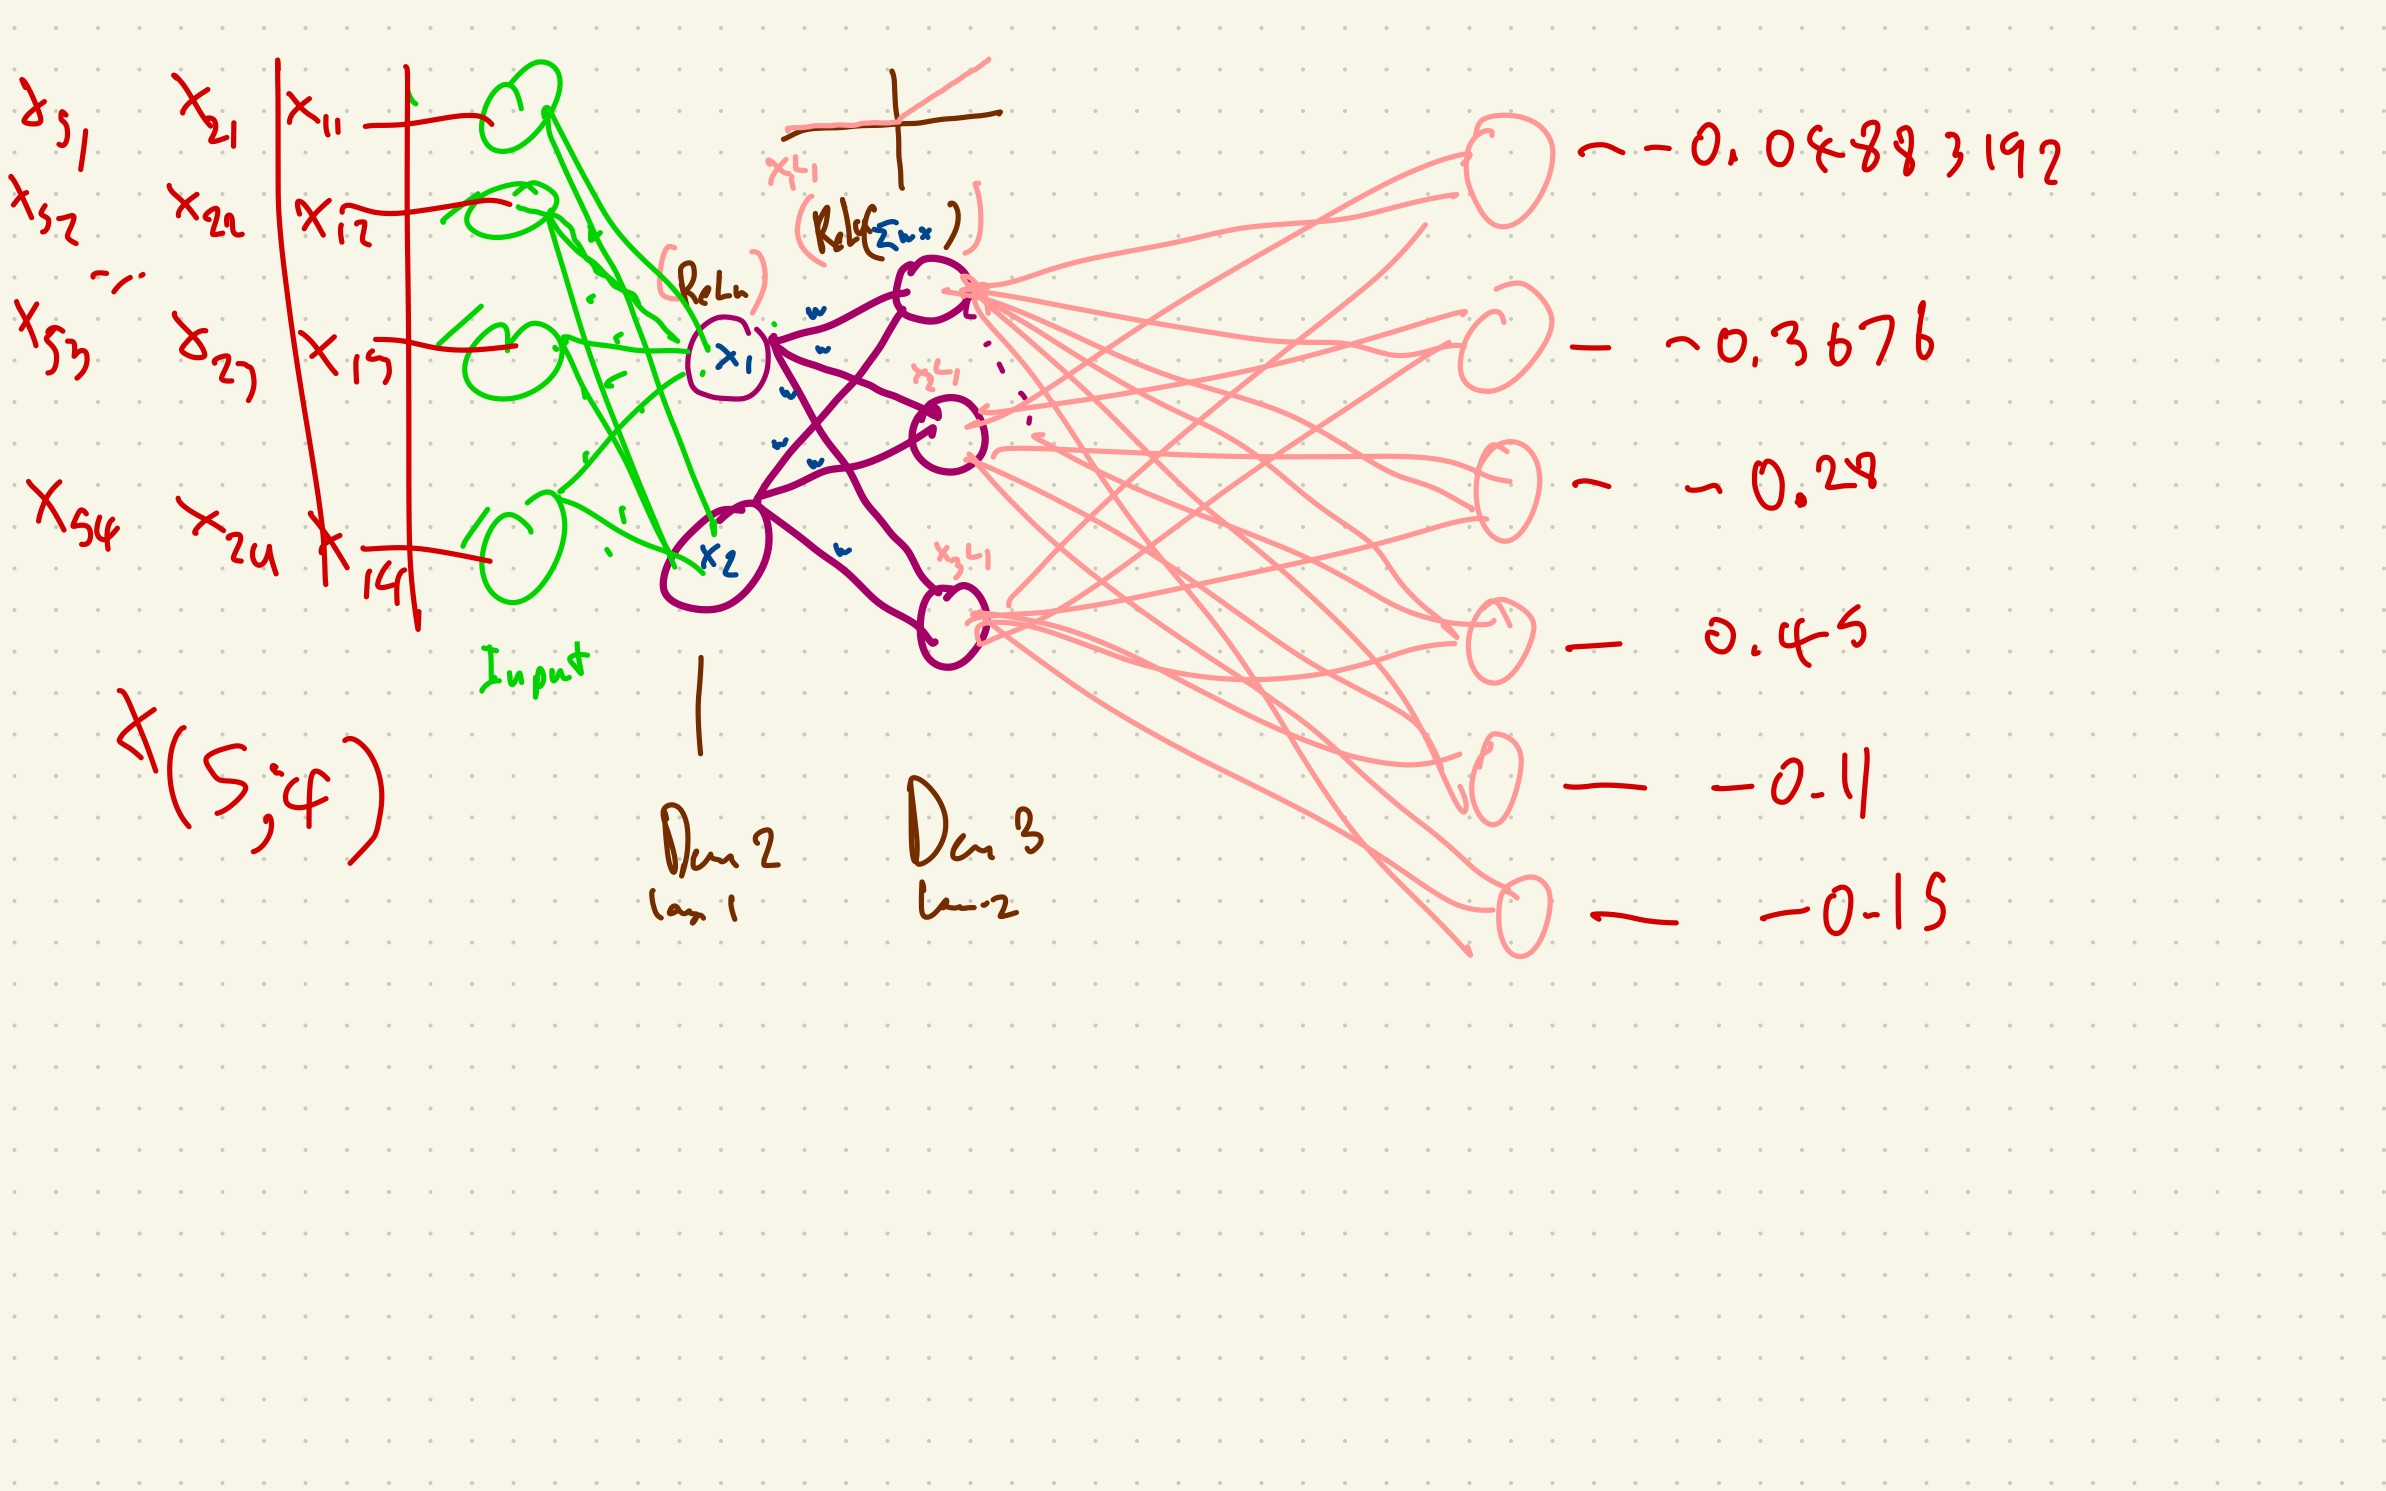

# ลองเทรน Sequential model ที่สร้างขึ้นเอง

In [15]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## load data

In [16]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


### แปลงค่าเป็น 0-1 เพื่อนำเข้า network

In [17]:
# Normalize pixel values to be between 0 and 1 !!! ค่าสูงสุดคือ 255 (ค่าสี)
train_images, test_images = train_images / 255.0, test_images / 255.0

### plot รูปตัวอย่าง

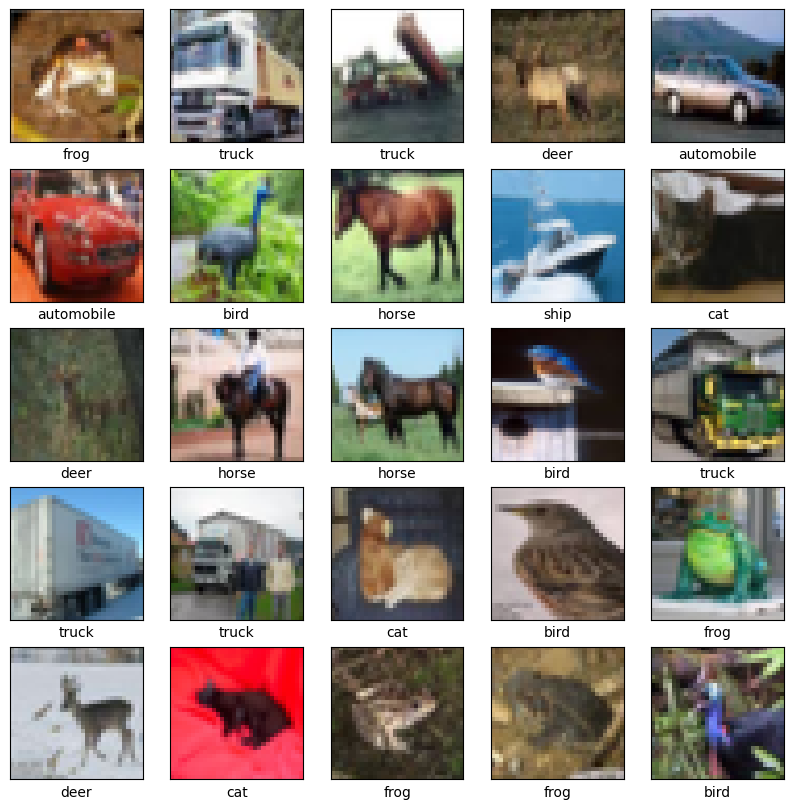

In [18]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Define

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # มี 896 kernel ที่จะไปคูณ
model.add(layers.MaxPooling2D((2, 2))) # ดูทุกๆ 2 pixel ==> เหลือ 15*15 pixel
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

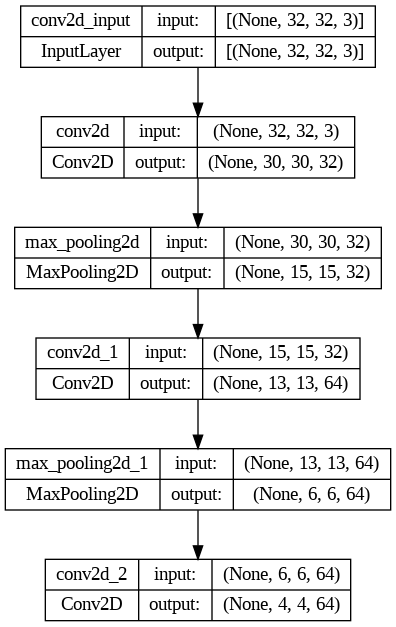

In [21]:
keras.utils.plot_model(model,show_shapes=True) #plot จน.params

### ต่อด้วย flatten และ dense เพื่อทำนาย

In [22]:
model.add(layers.Flatten()) #จับ input ทุกอันมายืดเป็นเส้นตรง ทำให้ไม่มีมิติ
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

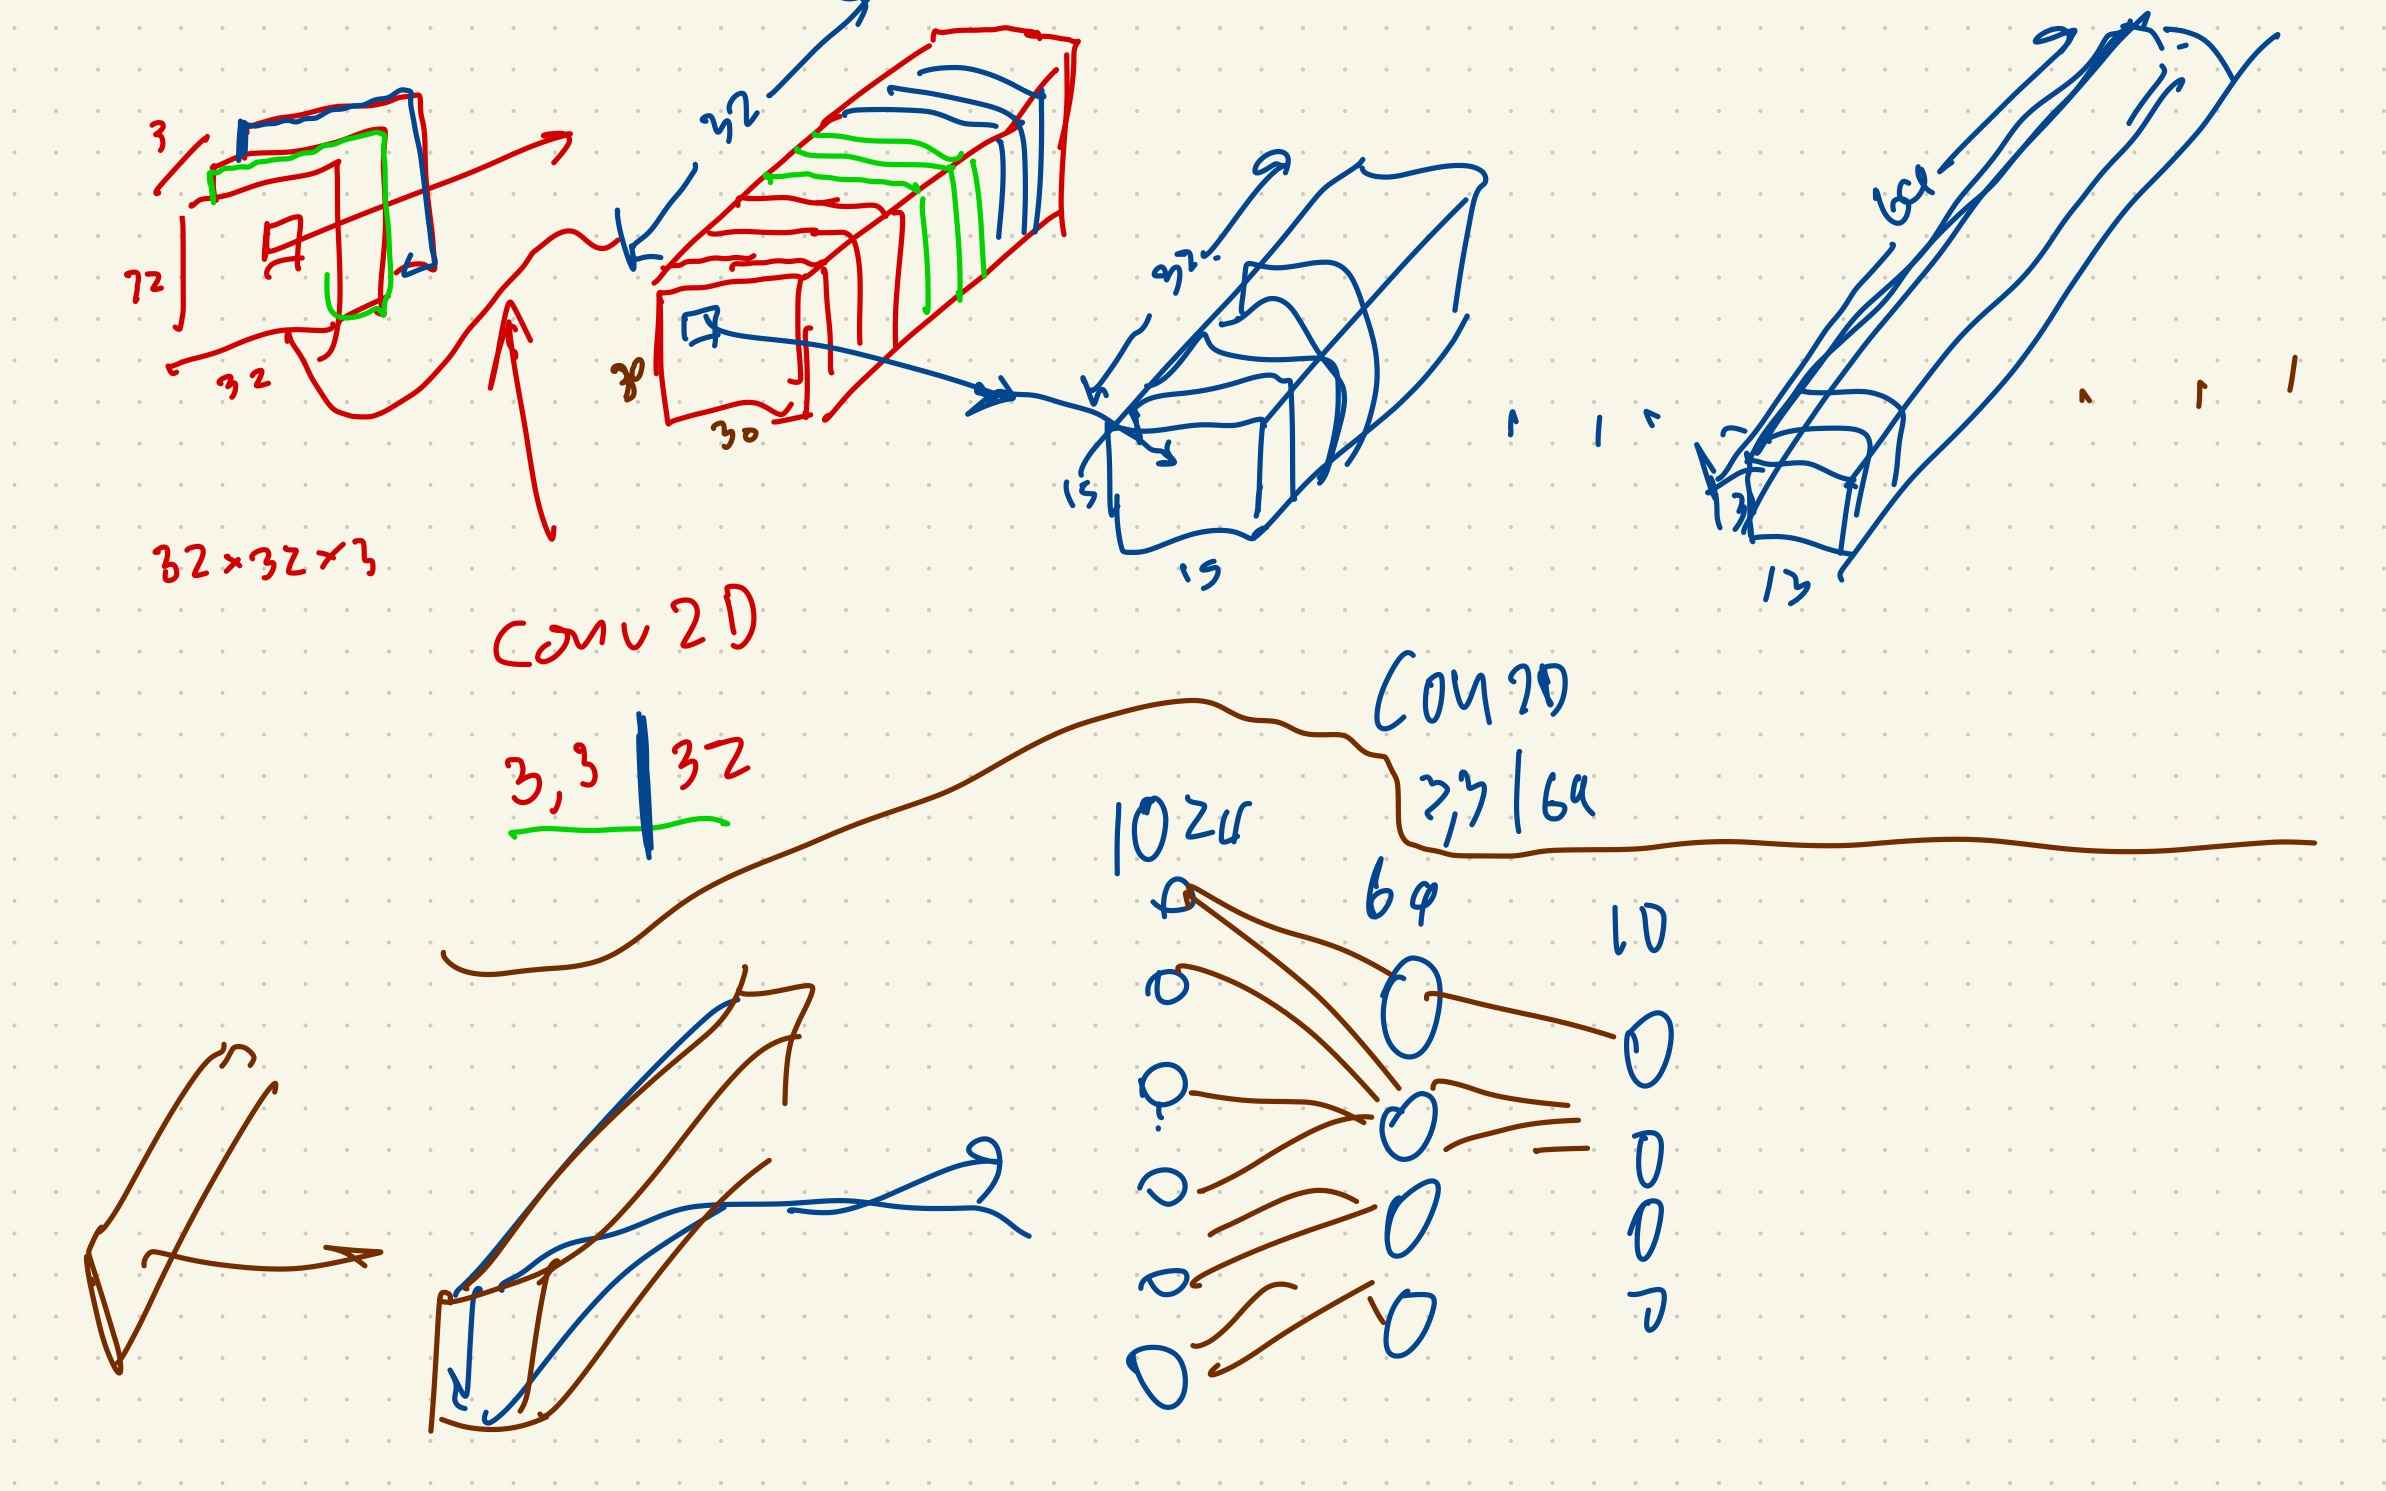

### Define training parameters

In [24]:
model.compile(optimizer='adam', # ตัวบอกว่า network จะวิ่งไปแบบไหน
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # ส่ง back ไปอัพเดต weight
              metrics=['accuracy'])

### Train

In [25]:
train_labels #เวลาใช้จริง ต้อง one-hot ==> 000010000

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [26]:
history = model.fit(train_images, train_labels, epochs=2,
                    validation_data=(test_images, test_labels))

Epoch 1/2
1563/1563 [==============================] - 19s 9ms/step - loss: 1.5263 - accuracy: 0.4466 - val_loss: 1.2607 - val_accuracy: 0.5481
Epoch 2/2
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1547 - accuracy: 0.5922 - val_loss: 1.1489 - val_accuracy: 0.5878


### Test

In [27]:
history.history

{'loss': [1.526347041130066, 1.1547060012817383],
 'accuracy': [0.4465999901294708, 0.5922200083732605],
 'val_loss': [1.2607139348983765, 1.1488807201385498],
 'val_accuracy': [0.5480999946594238, 0.5878000259399414]}

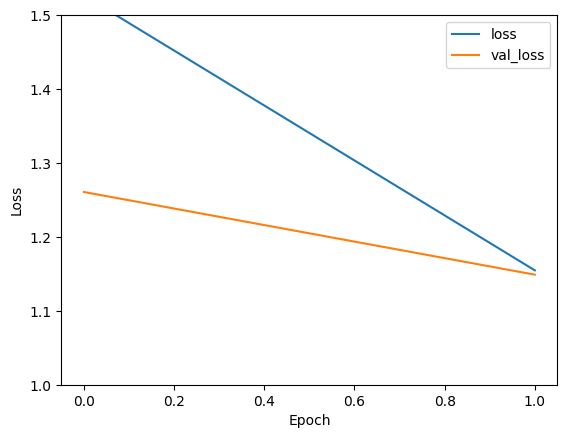

In [28]:
plt.plot([0, 1], history.history['loss'], label='loss')
plt.plot([0, 1], history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([1.0, 1.5])
plt.legend(loc='upper right')

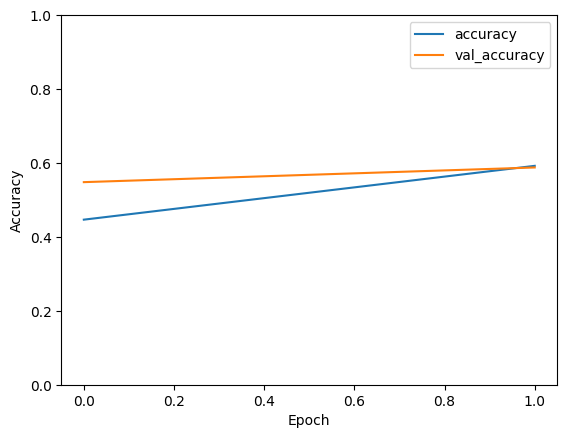

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='upper right')

In [30]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.1489 - accuracy: 0.5878 - 657ms/epoch - 2ms/step


In [31]:
print(test_acc)

0.5878000259399414


# **Functional**

> pre train model มาแก้ไข

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

`เราไม่จำเป็นต้องเขียนเรียงกัน แค่มี input + function + output ให้มันพอ`

In [33]:
input_images = keras.Input(shape=(32, 32, 3), name="img")
model = layers.Conv2D(32, (3, 3), activation="relu", name="conv1")(input_images) # (input_images) input จาก layer ก่อนหน้า
model = layers.MaxPooling2D((2, 2), name="maxpool1")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv2")(model)
model = layers.MaxPooling2D((2, 2), name="maxpool2")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv3")(model)
model = layers.Flatten(name="Flatten")(model)
model = layers.Dense(64, activation='relu', name="activation")(model)
output = layers.Dense(10, name="output")(model)

In [34]:
my_model = keras.Model(input_images, output, name = "mymodel") # ต้องมีคำสั่งที่บอกว่า input output คืออะไร สามารถมีหลายอันได้ list ของ in/out

In [35]:
my_model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 maxpool2 (MaxPooling2D)     (None, 6, 6, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          36928     
                                                                 
 Flatten (Flatten)           (None, 1024)              0   

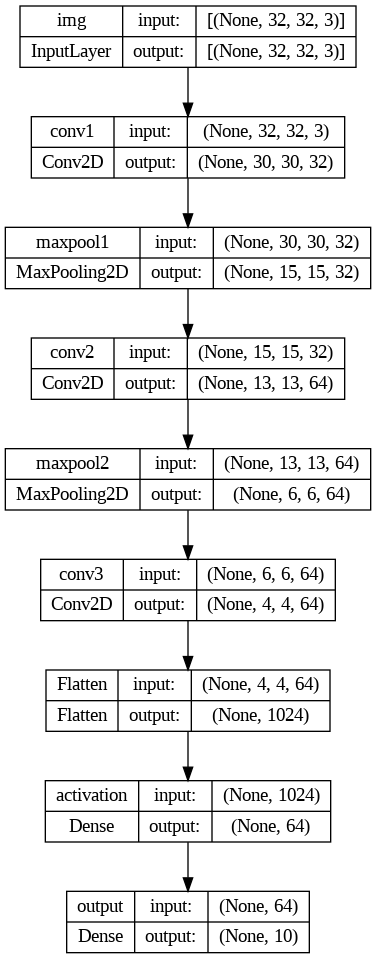

In [36]:
keras.utils.plot_model(my_model, show_shapes=True)

In [37]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
history = my_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5219 - accuracy: 0.4463 - val_loss: 1.2600 - val_accuracy: 0.5491
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1667 - accuracy: 0.5862 - val_loss: 1.1157 - val_accuracy: 0.6019
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0247 - accuracy: 0.6392 - val_loss: 1.0288 - val_accuracy: 0.6381
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9212 - accuracy: 0.6771 - val_loss: 0.9579 - val_accuracy: 0.6692
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8392 - accuracy: 0.7072 - val_loss: 0.9316 - val_accuracy: 0.6786
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7741 - accuracy: 0.7275 - val_loss: 0.8897 - val_accuracy: 0.6969
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7189 - accuracy: 0.7471 - val_loss: 0.8496 - val_accuracy:

313/313 - 1s - loss: 0.9002 - accuracy: 0.7021 - 652ms/epoch - 2ms/step


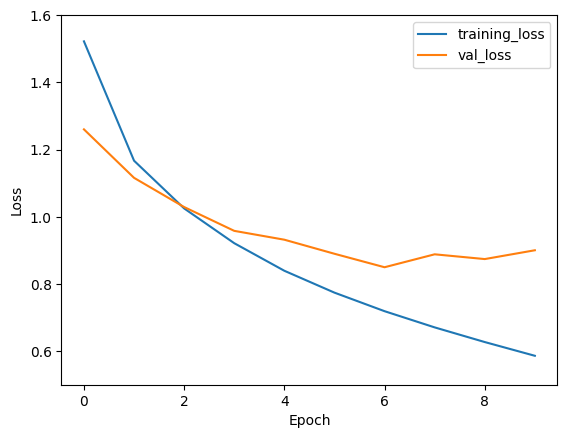

In [39]:
plt.plot(range(10), history.history['loss'], label='training_loss') # ค่า x ต้องเป็น 0-9
plt.plot(range(10), history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1.6])
plt.legend(loc='upper right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.9002 - accuracy: 0.7021 - 641ms/epoch - 2ms/step


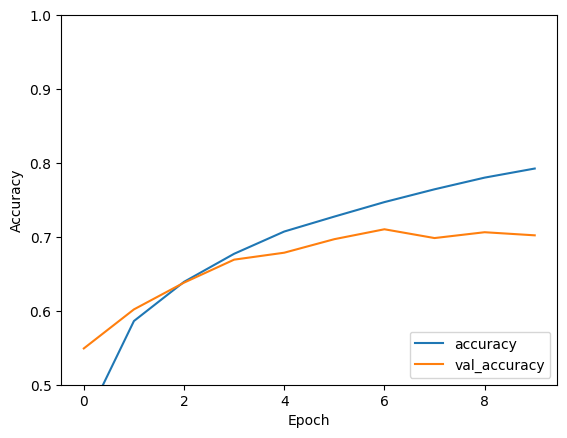

In [40]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [41]:
print(test_acc)

0.7020999789237976


### ResNet
➡ มี skip connection ข้อมูลไม่หายไประหว่างทาง ข้ามเลย

In [42]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output]) #รับทางตรง กับ รับอันที่ skip

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x) #sum data
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

resnet_model = keras.Model(inputs, outputs, name="toy_resnet")
resnet_model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 30, 30, 32)           896       ['img[0][0]']                 
                                                                                                  
 conv2d_4 (Conv2D)           (None, 28, 28, 64)           18496     ['conv2d_3[0][0]']            
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 9, 9, 64)             0         ['conv2d_4[0][0]']            
 g2D)                                                                                    

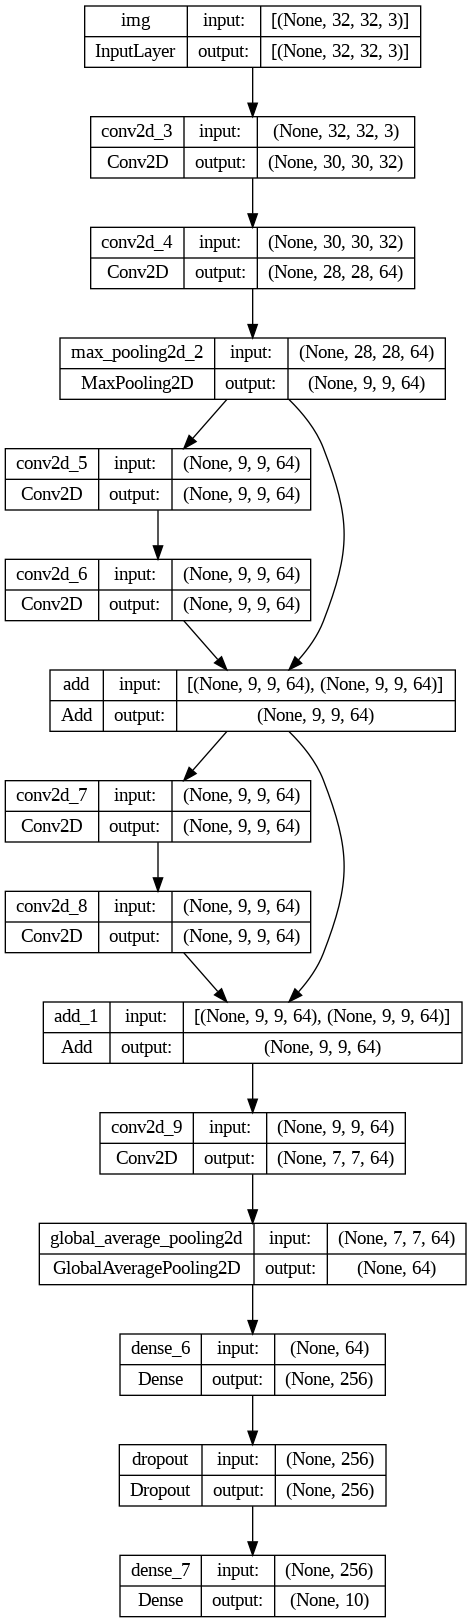

In [43]:
keras.utils.plot_model(resnet_model,  show_shapes=True)

In [44]:
resnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [45]:
history = resnet_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 15s 7ms/step - loss: 1.6556 - accuracy: 0.3578 - val_loss: 1.3007 - val_accuracy: 0.5138
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1804 - accuracy: 0.5667 - val_loss: 1.0649 - val_accuracy: 0.6125
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9642 - accuracy: 0.6555 - val_loss: 0.9175 - val_accuracy: 0.6712
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8455 - accuracy: 0.6989 - val_loss: 0.8394 - val_accuracy: 0.7059
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7528 - accuracy: 0.7375 - val_loss: 0.7207 - val_accuracy: 0.7451
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6850 - accuracy: 0.7604 - val_loss: 0.7034 - val_accuracy: 0.7575
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6261 - accuracy: 0.7808 - val_loss: 0.7140 - val_ac

313/313 - 1s - loss: 0.9002 - accuracy: 0.7021 - 656ms/epoch - 2ms/step


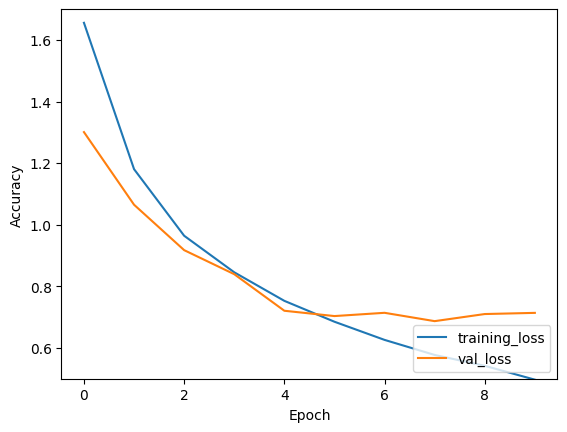

In [46]:
plt.plot(range(10), history.history['loss'], label='training_loss')
plt.plot(range(10), history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.7])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.9002 - accuracy: 0.7021 - 637ms/epoch - 2ms/step


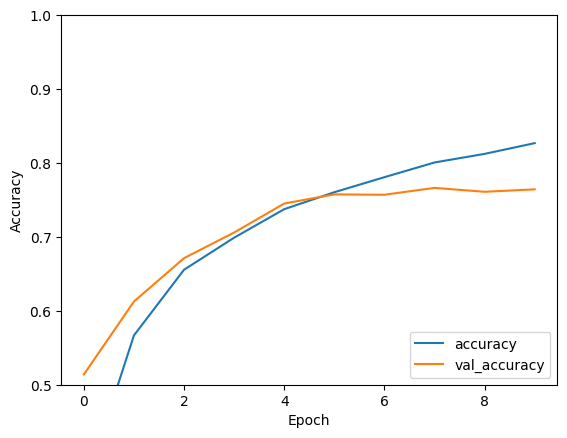

In [47]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [48]:
print(test_acc)

0.7020999789237976


# Tensorflow Data Pipeline

```
Pipeline :โหลดข้อมูลมาทีละส่วน ง่ายสุดคือ สร้างพท.เก็บให้มัน
flow from directory : โฟลเดอร์แยก tran test label
```

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
path2data = '/content/drive/MyDrive/Classification Dataset'

In [206]:
inputs = keras.Input(shape=(200, 200, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2)(x)

resnet_model_dm = keras.Model(inputs, outputs, name="resnet_dog_muff")
resnet_model_dm.summary()

Model: "resnet_dog_muff"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d_69 (Conv2D)          (None, 198, 198, 32)         896       ['img[0][0]']                 
                                                                                                  
 conv2d_70 (Conv2D)          (None, 196, 196, 64)         18496     ['conv2d_69[0][0]']           
                                                                                                  
 max_pooling2d_11 (MaxPooli  (None, 65, 65, 64)           0         ['conv2d_70[0][0]']           
 ng2D)                                                                              

### **Data Pipeline**
```
1. ทำ image augmentation: จับ pattern โดย rotation, flip, shift
2. ชี้ path
```

In [207]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentation ถ้าทางการแพทย์ก็ไม่ควรใช้ flip : left right affects
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2, #ดึงมุม
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        path2data,
        # All images will be resized to target height and width.
        target_size=(200, 200),
        batch_size=4,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# # Note that the validation data should not be augmented!
# test_datagen = ImageDataGenerator(rescale=1./255)
# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(height, width),
#         batch_size=batch_size,
#         class_mode='categorical')

Found 30 images belonging to 2 classes.


In [208]:
from tensorflow.keras import optimizers

In [209]:
from tensorflow.keras.callbacks import LearningRateScheduler

lr = 2e-0

def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr * 0.1
    else:
        return lr


lr_scheduler = LearningRateScheduler(lr_schedule)

In [210]:
resnet_model_dm.compile(optimizer=optimizers.Adam(lr=lr),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [211]:
history = resnet_model_dm.fit(train_generator,
                    epochs=30,
                    #steps_per_epoch=len(train_generator),
                    callbacks=[lr_scheduler])

Epoch 1/30
8/8 [==============================] - 4s 55ms/step - loss: 3.2928 - accuracy: 0.4333 - lr: 1.0000e-04
Epoch 2/30
8/8 [==============================] - 1s 70ms/step - loss: 1.8013 - accuracy: 0.5333 - lr: 1.0000e-05
Epoch 3/30
8/8 [==============================] - 1s 60ms/step - loss: 1.7392 - accuracy: 0.5333 - lr: 1.0000e-06
Epoch 4/30
8/8 [==============================] - 1s 63ms/step - loss: 2.2761 - accuracy: 0.5000 - lr: 1.0000e-07
Epoch 5/30
8/8 [==============================] - 1s 64ms/step - loss: 1.0829 - accuracy: 0.6000 - lr: 1.0000e-08
Epoch 6/30
8/8 [==============================] - 1s 69ms/step - loss: 1.2728 - accuracy: 0.5000 - lr: 1.0000e-09
Epoch 7/30
8/8 [==============================] - 1s 73ms/step - loss: 1.2918 - accuracy: 0.6333 - lr: 1.0000e-10
Epoch 8/30
8/8 [==============================] - 1s 69ms/step - loss: 1.7968 - accuracy: 0.4667 - lr: 1.0000e-11
Epoch 9/30
8/8 [==============================] - 1s 73ms/step - loss: 2.3730 - accuracy

313/313 - 1s - loss: 0.9002 - accuracy: 0.7021 - 840ms/epoch - 3ms/step


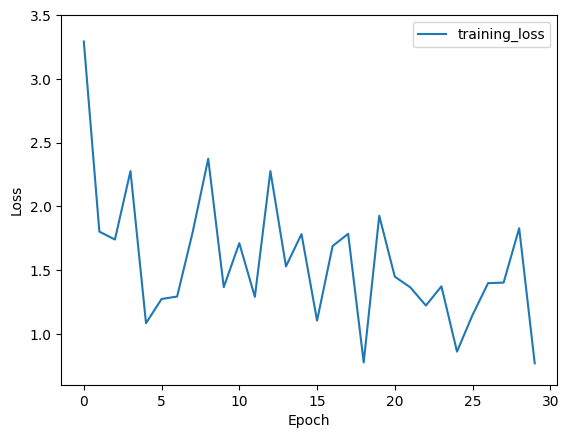

In [214]:
plt.plot(range(30), history.history['loss'], label='training_loss')
#plt.plot(range(50), history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.6, 3.5])
plt.legend(loc='upper right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)